## Graphing our Results

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb

In [28]:
data = pd.read_csv('thresholdcomparisons.csv')
results = pd.DataFrame(data)
results

S  1,000  10,000  100,000  1,000,000  10,000,000
0     1   8704  120413  1536118    1536328   220043278
1     2   8461  118368  1518764    1519024   217944150
2     3   8447  117144  1498106    1498546   216870080
3     4   8303  116987  1496941    1497430   216544365
4     5   8303  116004  1496941    1497430   215734832
..  ...    ...     ...      ...        ...         ...
95   96  19182  261224  2288695    2292614   357777078
96   97  19182  261224  2667152    2674666   357777078
97   98  19182  261224  3410749    3414726   357777078
98   99  19182  261224  3410749    3414726   357777078
99  100  19182  261224  3410749    3414726   357777078

[100 rows x 6 columns]

In [29]:
minVal = results.idxmin()
avg = (4+5+6+4+5)/5
print(f"minVal = {minVal}\n avg = {avg}")

minVal = S             0
1,000         3
10,000        4
100,000       5
1,000,000     3
10,000,000    4
dtype: int64
 avg = 4.8


### Table & Graph for Fixed S = 5

In [30]:
list = [[1000, 8303],[10000,116004],[100000, 1496941],[1000000,1497430],[10000000,215734832]]
df = pd.DataFrame(list, columns =['N', 'Comparisons'])
df

N  Comparisons
0      1000         8303
1     10000       116004
2    100000      1496941
3   1000000      1497430
4  10000000    215734832

<AxesSubplot:xlabel='N', ylabel='Comparisons'>

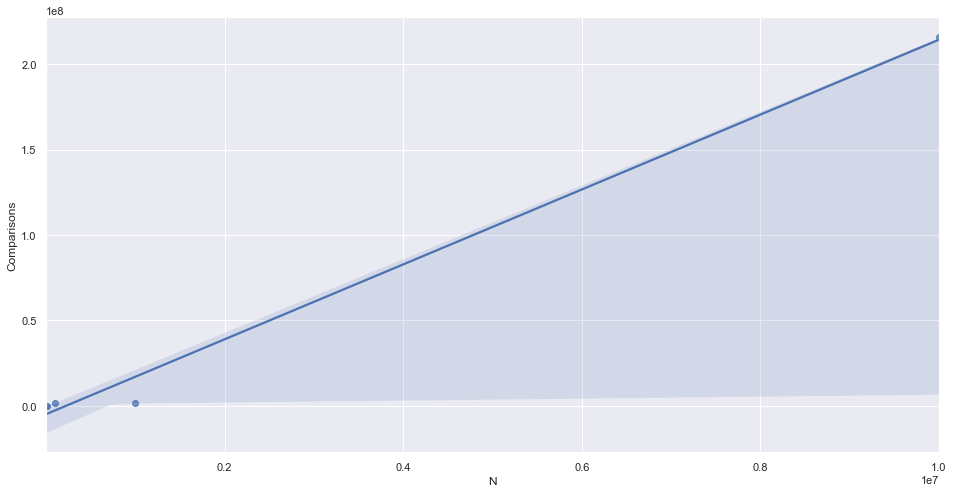

In [31]:
sb.set_theme()

f = plt.figure(figsize=(16, 8))
sb.regplot(x=df["N"], y=df["Comparisons"])

### Graph for Fixed N (1,000)

<AxesSubplot:xlabel='S', ylabel='1,000'>

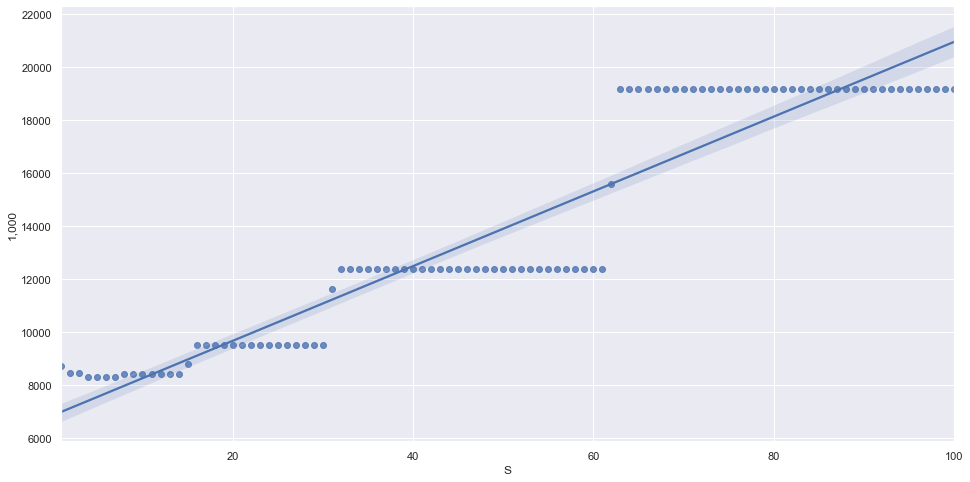

In [32]:
f = plt.figure(figsize=(16, 8))
sb.regplot(x=results["S"], y=results["1,000"])

### Graph for Fixed N (10,000)

<AxesSubplot:xlabel='S', ylabel='10,000'>

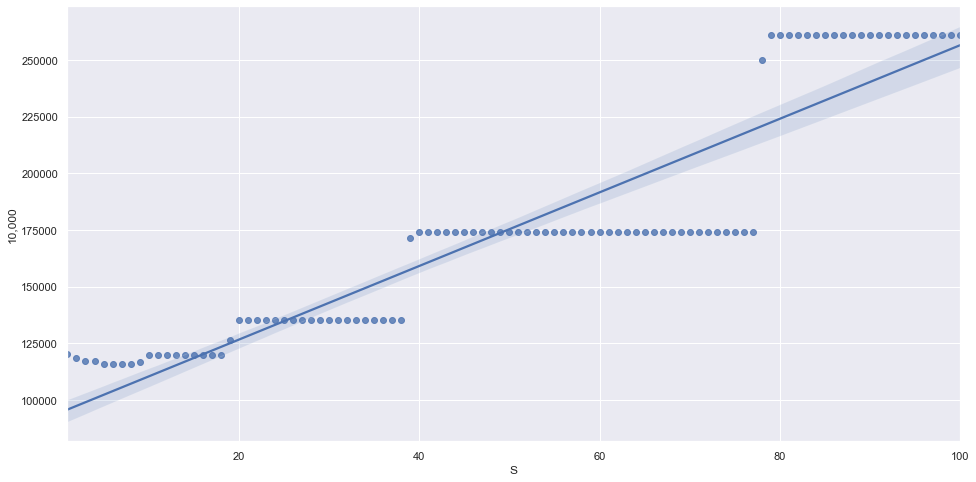

In [33]:
f = plt.figure(figsize=(16, 8))
sb.regplot(x=results["S"], y=results["10,000"])

### Graph for Fixed N (100,000)

<AxesSubplot:xlabel='S', ylabel='100,000'>

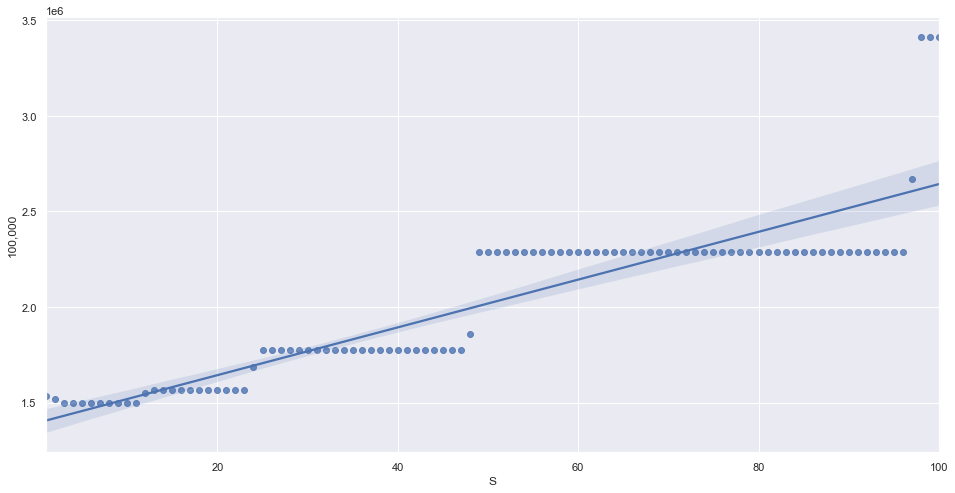

In [34]:
f = plt.figure(figsize=(16, 8))
sb.regplot(x=results["S"], y=results["100,000"])

### Graph for Fixed N (1,000,000)

<AxesSubplot:xlabel='S', ylabel='1,000,000'>

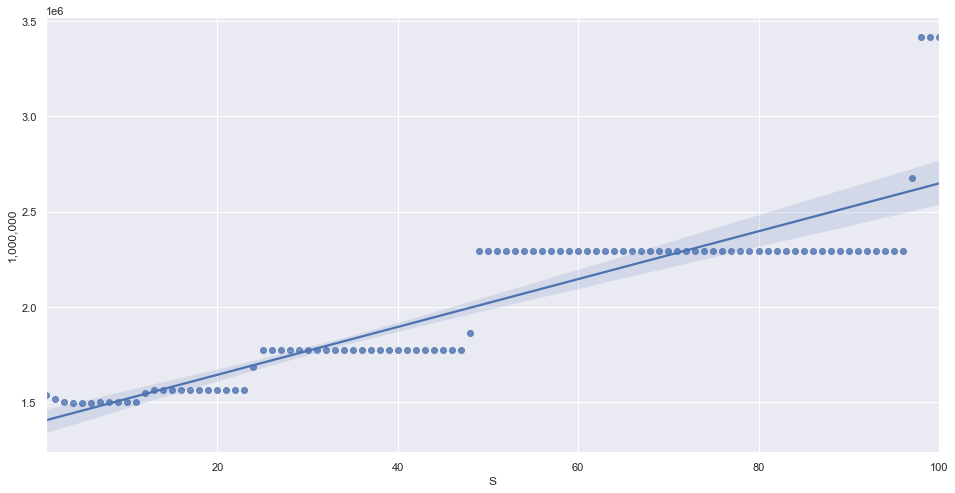

In [35]:
f = plt.figure(figsize=(16, 8))
sb.regplot(x=results["S"], y=results["1,000,000"])

### Graph for Fixed N (10,000,000)

<AxesSubplot:xlabel='S', ylabel='10,000,000'>

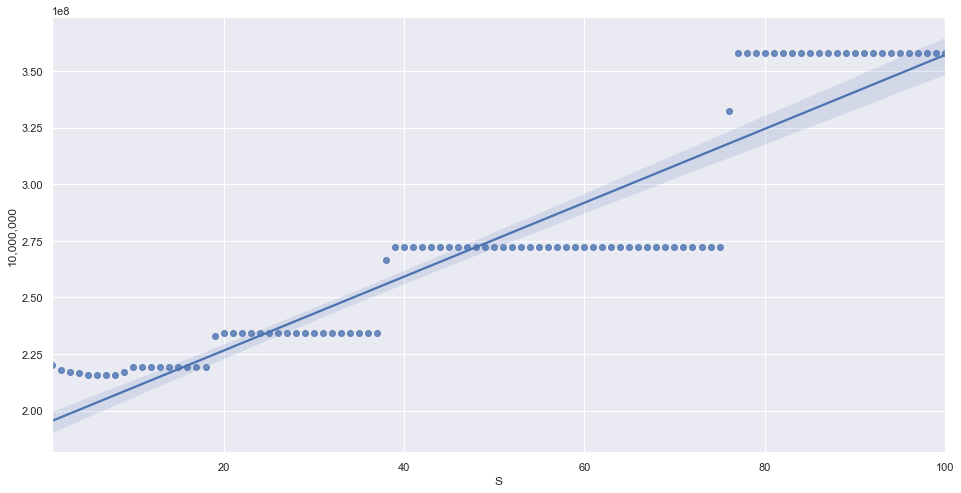

In [36]:
f = plt.figure(figsize=(16, 8))
sb.regplot(x=results["S"], y=results["10,000,000"])

### Theoretical Analysis of Time Complexity

![MergeSort Analysis](https://i.stack.imgur.com/4H8eH.jpg)

**Complexity Of Merge Sort**

- Total work done by merge sort in copying n elements from each level to upper level is O(n)
- Number of levels = number of sublists or small problem = O( log($^n/_x$) )
- Complexity of Merge sort : O( n * log($^n/_x$) )


**Complexity Of Insertion Sort**

We are sorting $^n/_x$ lists each of x elements using insertion sort so complexity contributed by insertion sort is $^n/_x$ * complexity of INSERTION(x)


Total complexity = O ( $^n/_x$ * INSERTION(x) + n * log($^n/_x$) )


**Best Case**

When Insertion sort performs in best case with O( n ), i.e. INSERTION (x) = x
Best Case Complexity = Total Complexity = Θ( n + n * log($^n/_x$) )


**Worst Case**

When Insertion sort perform in best case with O( $n^2$ ), i.e. INSERTION (x) = $x^2$
Best Case Complexity = Total Complexity = Θ( nx + n * log($^n/_x$) )

### Empirical Analysis

From our plotted graphs, we can clearly see that the best fit line is a linear line, hence our empirical obeservations match with our theoretical analysis.

We choose S=5 because it has the lowest number of key comparisions from our findings. Further research about the JDK sort array shows that it has a value of S=7, which indicates that our choice is close to optimal.

## Comparing Fixed N(10,000,000) and S=5 for HybridSort and MergeSort
We are using pre-collected data from our Java implementation

In [38]:
import pandas as pd

df = pd.read_csv('algodata2.csv')
print(df)


    Trial  time_merge  comp_merge  time_hybrid  comp_hybrid
0       1  1492063900   220043724   1810253500    215734076
1       2  1377632700   220044996   1330037700    215731806
2       3  1386628300   220046726   1297879100    215734438
3       4  1405643300   220047661   1284105700    215732929
4       5  1433470900   220050122   1308849600    215739556
5       6  1389261300   220048890   1286855500    215738742
6       7  1398889200   220048845   1314037200    215735605
7       8  1386181200   220046358   1301935400    215735562
8       9  1367858200   220045336   1283740200    215733830
9      10  1407434500   220045354   1317485700    215734652
10     11  1505113800   220046730   1716522000    215737883
11     12  1385284100   220046711   1284603000    215738705
12     13  1372909200   220049912   1288329400    215728363
13     14  1382903300   220048686   1295011700    215728735
14     15  1407209100   220047354   1319644000    215733783
15     16  1439571400   220048777   1299

In [39]:
analysis2 = pd.DataFrame(df,columns=['time_merge', 'time_hybrid'])

## Boxplot Comparing Runtime for the 2 Sorting Algorithms

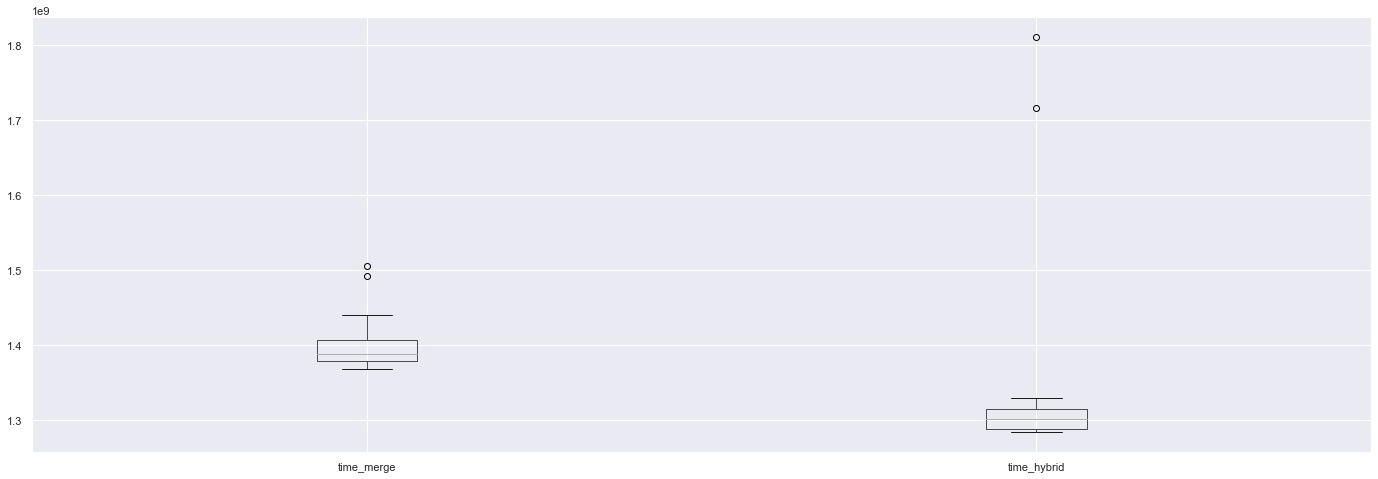

In [40]:
f = plt.figure(figsize=(24, 8))
boxplot = analysis2.boxplot(column=['time_merge', 'time_hybrid'],return_type='axes') 

In [41]:
analysis2.describe()

time_merge   time_hybrid
count  2.000000e+01  2.000000e+01
mean   1.403126e+09  1.346768e+09
std    3.784766e+07  1.438621e+08
min    1.367858e+09  1.283740e+09
25%    1.378968e+09  1.288393e+09
50%    1.387945e+09  1.301394e+09
75%    1.407265e+09  1.314899e+09
max    1.505114e+09  1.810254e+09

## Comparing Averages
Avg time for merge sort -  1403125620 ns or 1.4 s 


Avg time for hybrid sort - 1346768115 ns or 1.3 s

**4 % decrease** in time on average. 


In [42]:
analysis1 = pd.DataFrame(df,columns=['comp_hybrid', 'comp_merge'])

In [43]:
analysis1

comp_hybrid  comp_merge
0     215734076   220043724
1     215731806   220044996
2     215734438   220046726
3     215732929   220047661
4     215739556   220050122
5     215738742   220048890
6     215735605   220048845
7     215735562   220046358
8     215733830   220045336
9     215734652   220045354
10    215737883   220046730
11    215738705   220046711
12    215728363   220049912
13    215728735   220048686
14    215733783   220047354
15    215733378   220048777
16    215736306   220050109
17    215733875   220047972
18    215735804   220047985
19    215733599   220045334

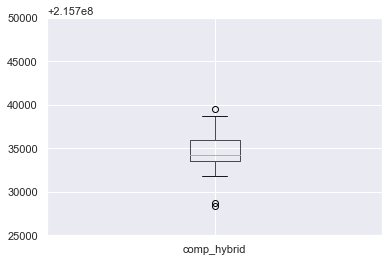

In [44]:
ax = analysis1.boxplot(column=['comp_hybrid'], return_type='axes')  
bottom,top = plt.ylim(215725000,215750000)
plt.show()

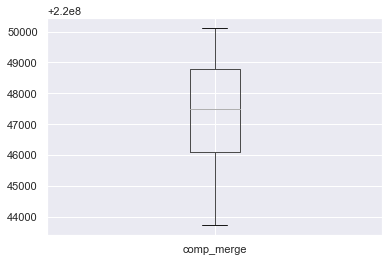

In [45]:
ax = analysis1.boxplot(column=['comp_merge'], return_type='axes')  
plt.show()

From the boxplots, we can see that hybridSort has a lower median number of comparisions compared to pure mergeSort.

We can also observe that the median runtime for the hybridSort is lesser than pure mergeSort 

In [46]:
analysis1.describe()

comp_hybrid    comp_merge
count  2.000000e+01  2.000000e+01
mean   2.157346e+08  2.200474e+08
std    2.939009e+03  1.837010e+03
min    2.157284e+08  2.200437e+08
25%    2.157335e+08  2.200461e+08
50%    2.157343e+08  2.200475e+08
75%    2.157359e+08  2.200488e+08
max    2.157396e+08  2.200501e+08

## Comparing Average Key Comparisons: 

Average number of comparisons for merge sort - 220047379.1

Average number of comparisons for hybrid sort - 215734581.4

Our results show a **2% decrease** for hybrid sort

## Theoretical Implications

Hybrid sort : Θ(NS + N*log(N/S))

Merge sort : Θ(N * log(N)) 